In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (X) and labels (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select 500 instances from each class
np.random.seed(42)  # for reproducibility
selected_indices = []
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices.extend(np.random.choice(class_indices, size=500, replace=False))

# Filter the selected instances
X_selected = X_scaled[selected_indices]

In [6]:
X.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (X) and labels (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Standardize the features
X /= 255.0

# Select 500 instances from each class
np.random.seed(42)
selected_indices = []
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices.extend(np.random.choice(class_indices, size=500, replace=False))

# Filter the selected instances
X_selected = X.values[selected_indices]
y_selected = y[selected_indices]

## Model selection

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compute_scores(X, n_clusters_list):
    wcss = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    for n_clusters in n_clusters_list:
        print(f"N = {n_clusters} done!")
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        labels = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    return wcss, silhouette_scores, calinski_scores, davies_bouldin_scores

def plot_criteria(criteria_scores_dict, n_clusters_list, best_values_dict):
    fig, axes = plt.subplots(1, len(criteria_scores_dict), figsize=(16, 5))
    for ax, (criteria_name, criteria_scores) in zip(axes, criteria_scores_dict.items()):
        ax.plot(n_clusters_list, criteria_scores, marker='o')
        if criteria_name != 'Elbow Method (WCSS)':
            ax.axvline(x=best_values_dict[criteria_name], color='r', linestyle='--', label=f'Best: {best_values_dict[criteria_name]}')
        ax.set_xlabel('Number of Clusters')
        ax.set_ylabel(criteria_name)
        ax.set_title(criteria_name)
        ax.legend()
    plt.tight_layout()
    plt.show()

def model_selection(X, n_clusters_list):
    criteria_scores_dict = {}
    
    # Calculate scores
    wcss, silhouette_scores, calinski_scores, davies_bouldin_scores = compute_scores(X, n_clusters_list)
    best_n_elbow = n_clusters_list[np.argmin(np.diff(np.diff(wcss))) + 1]
    criteria_scores_dict['Elbow Method (WCSS)'] = wcss
    best_n_silhouette = n_clusters_list[np.argmax(silhouette_scores)]
    criteria_scores_dict['Silhouette Score'] = silhouette_scores
    best_n_calinski = n_clusters_list[np.argmax(calinski_scores)]
    criteria_scores_dict['Calinski-Harabasz Index'] = calinski_scores
    best_n_davies_bouldin = n_clusters_list[np.argmin(davies_bouldin_scores)]
    criteria_scores_dict['Davies-Bouldin Index'] = davies_bouldin_scores
    
    best_values_dict = {'Elbow Method (WCSS)': best_n_elbow, 'Silhouette Score': best_n_silhouette,
                        'Calinski-Harabasz Index': best_n_calinski, 'Davies-Bouldin Index': best_n_davies_bouldin}
    
    # Plot all criteria
    plot_criteria(criteria_scores_dict, n_clusters_list, best_values_dict)

N = 5 done!
N = 10 done!
N = 15 done!
N = 20 done!
N = 25 done!
N = 30 done!
N = 35 done!
N = 40 done!
N = 45 done!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


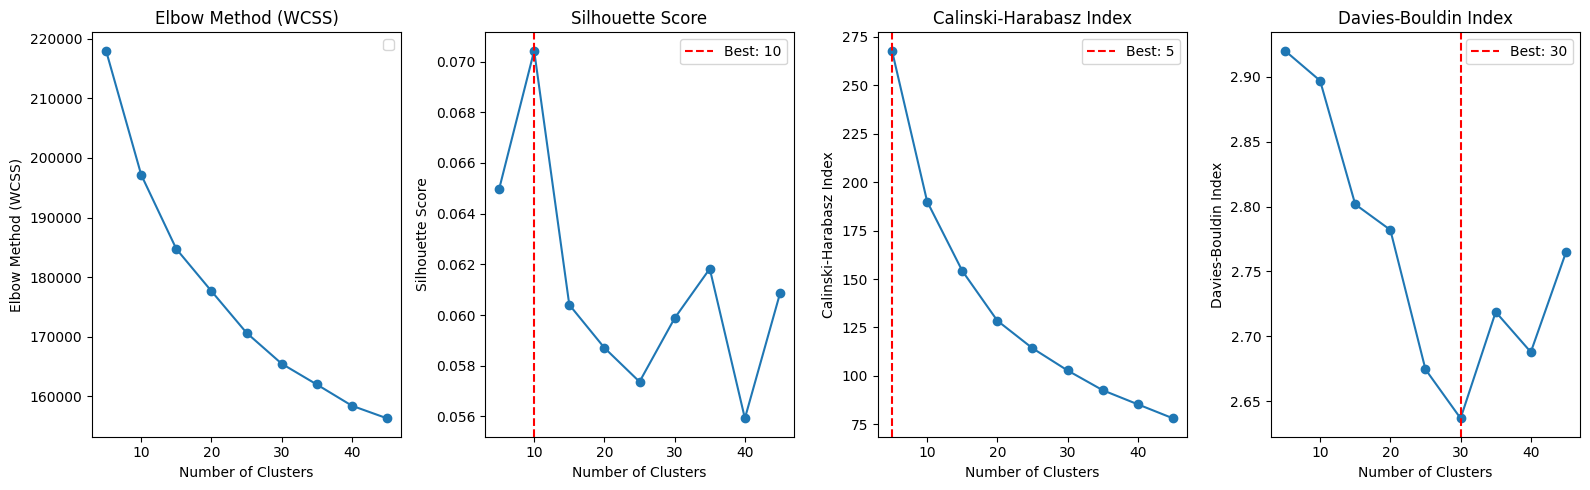

In [15]:
from sklearn.datasets import make_blobs

n_clusters_list = [i for i in range(5, 50, 5)]
# Perform model selection
model_selection(X_selected, n_clusters_list)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define different numbers of clusters
num_clusters_list = [i for i in range(5, 50, 5)]

all_cluster = {}

for num_clusters in num_clusters_list:
    all_cluster[num_clusters] = []
    for r in [0, 10, 20, 30]:
    
        # Fit KMeans clustering
        kmeans = KMeans(n_clusters=num_clusters, random_state=r)
        kmeans.fit(X_selected)
        # Predicted labels
        predicted_labels = kmeans.labels_

        for i in set(predicted_labels):
            val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
            all_cluster[num_clusters].append(np.max(val)/sum(val))

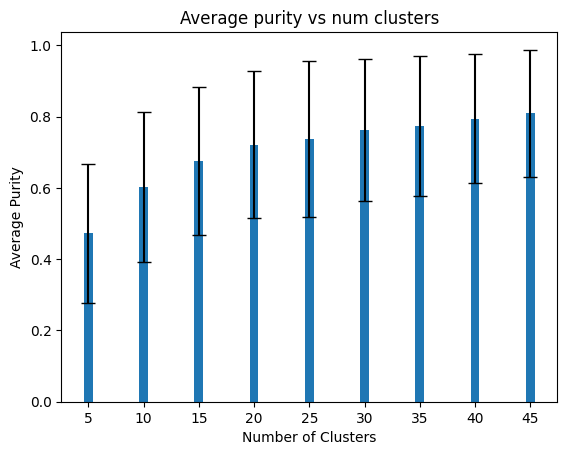

In [26]:
# Calculate means and standard deviations
means = [np.mean(all_cluster[key]) for key in sorted(all_cluster.keys())]
stds = [np.std(all_cluster[key]) for key in sorted(all_cluster.keys())]
clusters = sorted(all_cluster.keys())

# Plot bar plot with error bars
plt.figure()
plt.bar(clusters, means, yerr=stds, capsize=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Purity')
plt.title('Average purity vs num clusters')
plt.show()

## GMM Model selection

In [18]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def compute_scores(X, n_components_list):
    bic_scores = []
    aic_scores = []
    silhouette_scores = []
    calinski_scores = []
    davies_bouldin_scores = []
    for n in n_components_list:
        gmm = GaussianMixture(n_components=n)
        gmm.fit(X)
        labels = gmm.fit_predict(X)
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        silhouette_scores.append(silhouette_score(X, labels))
        calinski_scores.append(calinski_harabasz_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    return bic_scores, aic_scores, silhouette_scores, calinski_scores, davies_bouldin_scores

def plot_criteria(criteria_scores_dict, n_components_list, best_values_dict):
    fig, axes = plt.subplots(1, len(criteria_scores_dict), figsize=(16, 5))
    for ax, (criteria_name, criteria_scores) in zip(axes, criteria_scores_dict.items()):
        ax.plot(n_components_list, criteria_scores, marker='o')
        ax.axvline(x=best_values_dict[criteria_name], color='r', linestyle='--', label=f'Best: {best_values_dict[criteria_name]}')
        ax.set_xlabel('Number of Components')
        ax.set_ylabel(criteria_name)
        ax.set_title(criteria_name)
        ax.legend()
    plt.tight_layout()
    plt.show()

def model_selection(X, n_components_list):
    criteria_scores_dict = {}
    
    # Get scores
    bic_scores, aic_scores, silhouette_scores, calinski_scores, davies_bouldin_scores = compute_scores(X, n_components_list)
    
    # BIC
    best_n_bic = n_components_list[np.argmin(bic_scores)]
    criteria_scores_dict['BIC'] = bic_scores
    
    # # AIC
    # best_n_aic = n_components_list[np.argmin(aic_scores)]
    # criteria_scores_dict['AIC'] = aic_scores
    
    # Silhouette Score
    best_n_silhouette = n_components_list[np.argmax(silhouette_scores)]
    criteria_scores_dict['Silhouette Score'] = silhouette_scores
    
    # Calinski-Harabasz Index
    best_n_calinski = n_components_list[np.argmax(calinski_scores)]
    criteria_scores_dict['Calinski-Harabasz Index'] = calinski_scores
    
    # Davies-Bouldin Index
    best_n_davies_bouldin = n_components_list[np.argmin(davies_bouldin_scores)]
    criteria_scores_dict['Davies-Bouldin Index'] = davies_bouldin_scores
    
    best_values_dict = {'BIC': best_n_bic, 
                        # 'AIC': best_n_aic, 
                        'Silhouette Score': best_n_silhouette,
                        'Calinski-Harabasz Index': best_n_calinski, 'Davies-Bouldin Index': best_n_davies_bouldin,
                        }
    
    # Plot all criteria
    plot_criteria(criteria_scores_dict, n_components_list, best_values_dict)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define different numbers of clusters
num_clusters_list = [i for i in range(5, 50, 5)]

all_cluster = {}

for num_clusters in num_clusters_list:
    all_cluster[num_clusters] = []
    for r in [0, 10, 20, 30]:
        # Fit KMeans clustering
        gmm = GaussianMixture(n_components=num_clusters, random_state=r)
        gmm.fit(X_selected)
        # Predicted labels
        predicted_labels = gmm.fit_predict(X_selected)

        for i in set(predicted_labels):
            val = pd.Series(y_selected[predicted_labels == i]).value_counts().values
            all_cluster[num_clusters].append(np.max(val)/sum(val))

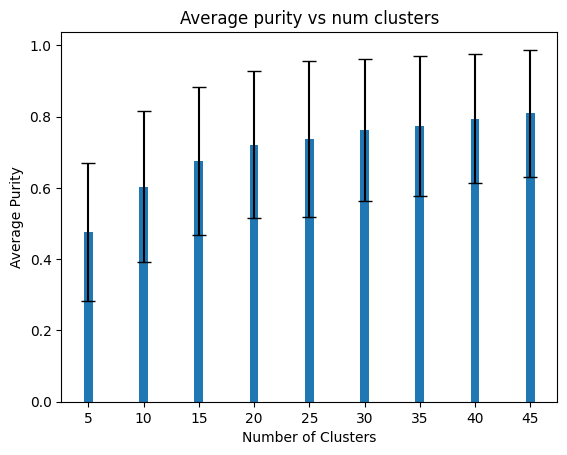

In [24]:
# Calculate means and standard deviations
means = [np.mean(all_cluster[key]) for key in sorted(all_cluster.keys())]
stds = [np.std(all_cluster[key]) for key in sorted(all_cluster.keys())]
clusters = sorted(all_cluster.keys())

# Plot bar plot with error bars
plt.figure()
plt.bar(clusters, means, yerr=stds, capsize=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Purity')
plt.title('Average purity vs num clusters')
plt.show()


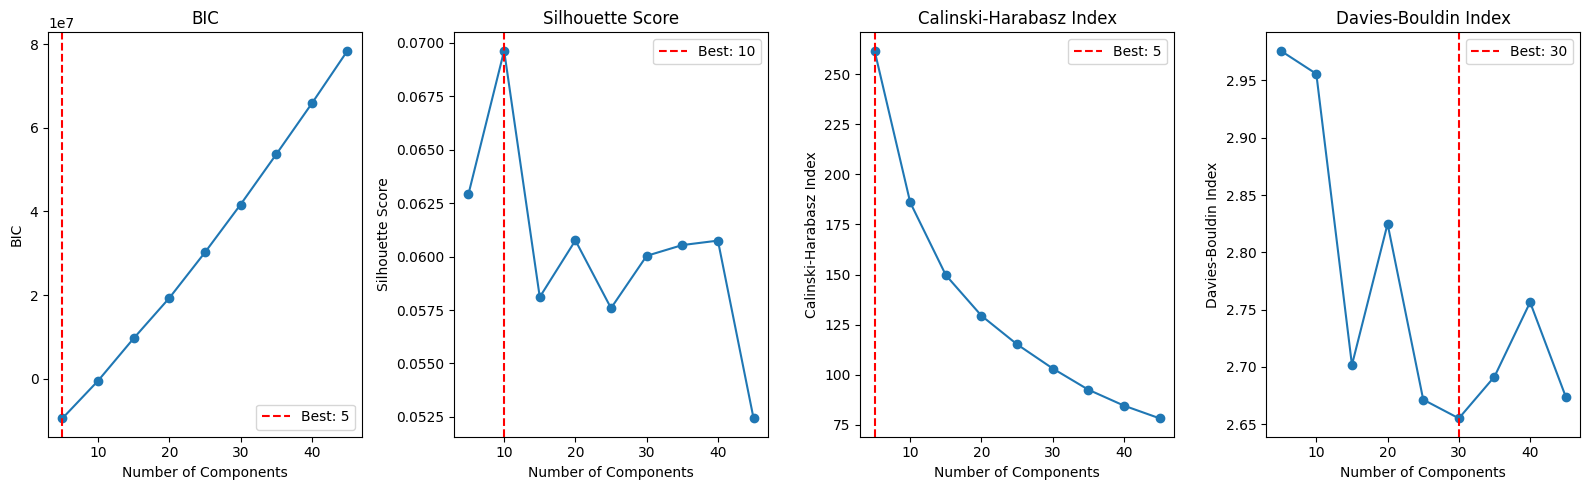

In [19]:
from sklearn.datasets import make_blobs

n_components_list = [i for i in range(5, 50, 5)]
# Perform model selection
model_selection(X_selected, n_components_list)

## PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

# Select 1 image for each digit
selected_indices = []
for digit in range(10):
    indices = np.where(y_selected == digit)[0]
    selected_indices.append(np.random.choice(indices))

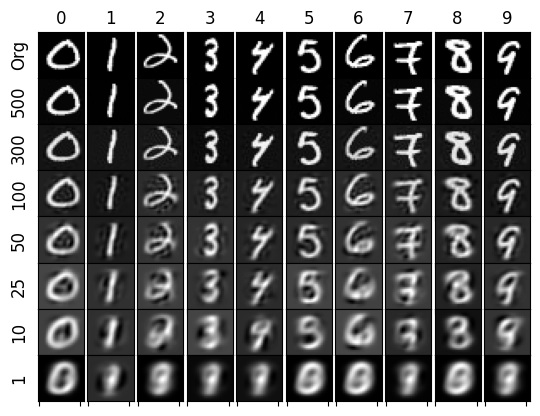

In [3]:
# Perform PCA inversion for different numbers of components
num_components_list = [500, 300, 100, 50, 25, 10, 1]  # Removed '00' from the list
pca_times = []
# Plot original and reconstructed images side by side
fig, axes = plt.subplots(len(num_components_list) + 1, 10)

for i, idx in enumerate(selected_indices):
    # Original image
    original_img = X_selected[idx].reshape(28, 28)
    axes[0, i].imshow(original_img, cmap='gray')
    axes[0, i].set_title(f'{y_selected.values[idx]}')
    axes[0, i].yaxis.set_ticklabels([])
    axes[0, i].xaxis.set_ticklabels([])
    axes[0, i].tick_params(left=False)
    axes[0, 0].set_ylabel(f'Org', fontsize=12, labelpad=0, loc="center")

# Perform PCA inversion for different numbers of components
for j, num_components in enumerate(num_components_list):
    
    start_time = time.time()    
    # Perform PCA
    pca = PCA(n_components=num_components)
    X_transformed = pca.fit_transform(X_selected)
    X_reconstructed = pca.inverse_transform(X_transformed)
    end_time = time.time()
    fitting_time = end_time - start_time
    
    pca_times.append(fitting_time)
    # Reconstructed image
    for i, idx in enumerate(selected_indices):
        reconstructed_img = X_reconstructed[idx].reshape(28, 28)
        axes[j + 1, i].imshow(reconstructed_img, cmap='gray')
        axes[j + 1, i].yaxis.set_ticklabels([])
        axes[j + 1, i].xaxis.set_ticklabels([])
        axes[j + 1, i].tick_params(left=False)
        if i == 0:# Set ylabel for the first plot in each row
            axes[j + 1, 0].set_ylabel(f'{num_components}', fontsize=12, labelpad=0, loc="center")
            axes[j + 1, 0].tick_params(left=False)

plt.subplots_adjust(wspace=0, hspace=0)  # Set the space between subplots to 0
plt.show()


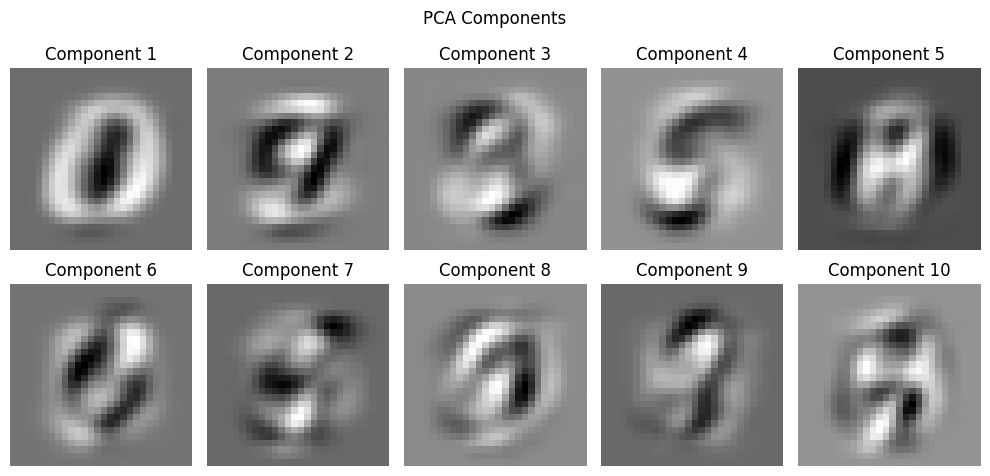

In [5]:
# Perform ICA
pca = PCA(n_components=10, random_state=42)
pca.fit(X_selected)
pca_components = pca.components_

# Plot the ICA components
plt.figure(figsize=(10, 5))
for i, component in enumerate(pca_components, 1):
    plt.subplot(2, 5, i)
    plt.imshow(component.reshape(28, 28), cmap='gray')
    plt.title(f'Component {i}')
    plt.axis('off')
plt.suptitle('PCA Components')
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def scree_plot(pca, n):
    """
    Creates a scree plot associated with the principal components 
    
    pca: fitted PCA object
    """
    num_components = len(pca.explained_variance_ratio_)
    index = np.arange(num_components)
    values = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    plt.bar(index[:n], values[:n])
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()

pca = PCA()
pca.fit(X_selected)

scree_plot(pca, 100)

# ICA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (X) and labels (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select 500 instances from each class
np.random.seed(42)  # for reproducibility
selected_indices = []
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices.extend(np.random.choice(class_indices, size=500, replace=False))

# Filter the selected instances
X_selected = X.values[selected_indices]

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

# Select 1 image for each digit
selected_indices = []
for digit in range(10):
    indices = np.where(y_selected == digit)[0]
    selected_indices.append(np.random.choice(indices))

d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Time taken for fitting and transforming with 500 components: 40.54 seconds
Time taken for fitting and transforming with 300 components: 13.30 seconds


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Time taken for fitting and transforming with 100 components: 4.91 seconds
Time taken for fitting and transforming with 50 components: 2.61 seconds
Time taken for fitting and transforming with 25 components: 2.63 seconds


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Time taken for fitting and transforming with 10 components: 2.27 seconds
Time taken for fitting and transforming with 1 components: 2.09 seconds


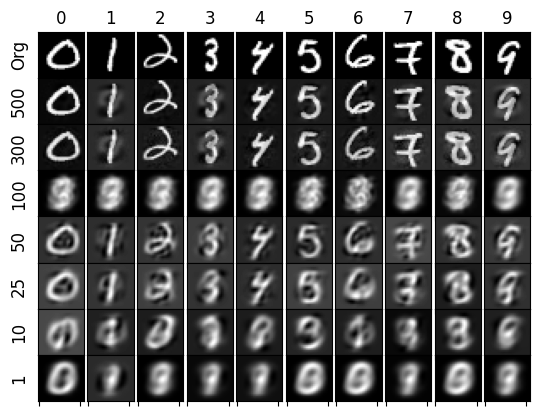

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

ica_times = []

# Perform ICA inversion for different numbers of components
num_components_list = [500, 300, 100, 50, 25, 10, 1]

# Plot original and reconstructed images side by side
fig, axes = plt.subplots(len(num_components_list) + 1, 10)

for i, idx in enumerate(selected_indices):
    # Original image
    original_img = X_selected[idx].reshape(28, 28)
    axes[0, i].imshow(original_img, cmap='gray')
    axes[0, i].set_title(f'{y_selected.values[idx]}')
    axes[0, i].yaxis.set_ticklabels([])
    axes[0, i].xaxis.set_ticklabels([])
    axes[0, i].tick_params(left=False)
    axes[0, 0].set_ylabel(f'Org', fontsize=12, labelpad=0, loc="center")
    
# Perform ICA inversion for different numbers of components
for j, num_components in enumerate(num_components_list):
    # Perform ICA and measure time
    start_time = time.time()
    if num_components == 0:
        ica = FastICA(random_state=42)
    else:
        ica = FastICA(n_components=num_components, random_state=21)
    X_transformed = ica.fit_transform(X_selected)
    end_time = time.time()
    fitting_time = end_time - start_time
    
    ica_times.append(fitting_time)
    X_reconstructed = ica.inverse_transform(X_transformed)
    # Reconstructed image
    for i, idx in enumerate(selected_indices):
        reconstructed_img = X_reconstructed[idx].reshape(28, 28)
        axes[j + 1, i].imshow(reconstructed_img, cmap='gray')
        axes[j + 1, i].yaxis.set_ticklabels([])
        axes[j + 1, i].xaxis.set_ticklabels([])
        axes[j + 1, i].tick_params(left=False)
        if i == 0:  # Set ylabel for the first plot in each row
            axes[j + 1, 0].set_ylabel(f'{num_components}', fontsize=12, labelpad=0, loc="center")
            axes[j + 1, 0].tick_params(left=False)
    
    print(f"Time taken for fitting and transforming with {num_components} components: {fitting_time:.2f} seconds")

plt.subplots_adjust(wspace=0, hspace=0)  # Set the space between subplots to 0
plt.show()


In [4]:
from scipy.stats import kurtosis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Perform ICA
ica = FastICA(n_components=500, random_state=42)
ica.fit(X_selected)
X_ica = ica.fit_transform(X_selected)
ica_components = ica.components_

# Calculate kurtosis for each independent component
ic_kurtosis = kurtosis(X_ica, axis=0)
sorted_indices = np.argsort(ic_kurtosis)[::-1]

# Plot the ICA components
plt.figure(figsize=(10, 5))
for i, component in enumerate(ica_components[sorted_indices[:10]], 1):
    plt.subplot(2, 5, i)
    plt.imshow(component.reshape(28, 28), cmap='gray')
    plt.title(f'Component {i}')
    plt.axis('off')
plt.suptitle('ICA Components')
plt.tight_layout()
plt.show()

In [10]:
# Plot the ICA components
plt.figure()
for i, component in enumerate(ica_components[sorted_indices[:10]], 1):
    plt.subplot(2, 5, i)
    plt.imshow(component.reshape(28, 28), cmap='gray')
    plt.title(f'{i}')
    plt.axis('off')
plt.suptitle('ICA Components')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [27]:
import numpy as np
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Assuming your data is stored in X and you want to retain 85%, 90%, and 95% of the kurtosis
percentage_thresholds = [0.85, 0.90, 0.95]

# Perform ICA
ica = FastICA(n_components=X_selected.shape[1], random_state=43)
X_ica = ica.fit_transform(X_selected)

# Calculate kurtosis for each independent component
ic_kurtosis = kurtosis(X_ica, axis=0)

# Sort ICs based on kurtosis
sorted_indices = np.argsort(ic_kurtosis)[::-1]
sorted_kurtosis = ic_kurtosis[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(x=sorted_indices, height=sorted_kurtosis)
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.title('Kurtosis Plot')
plt.show()

d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


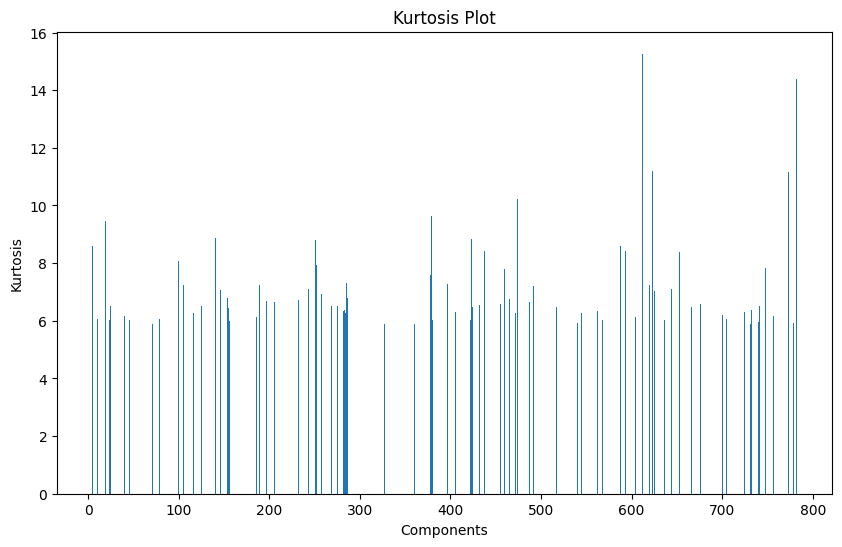

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(height=sorted_kurtosis[0:100], x=sorted_indices[:100])
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.title('Kurtosis Plot')
plt.show()

d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


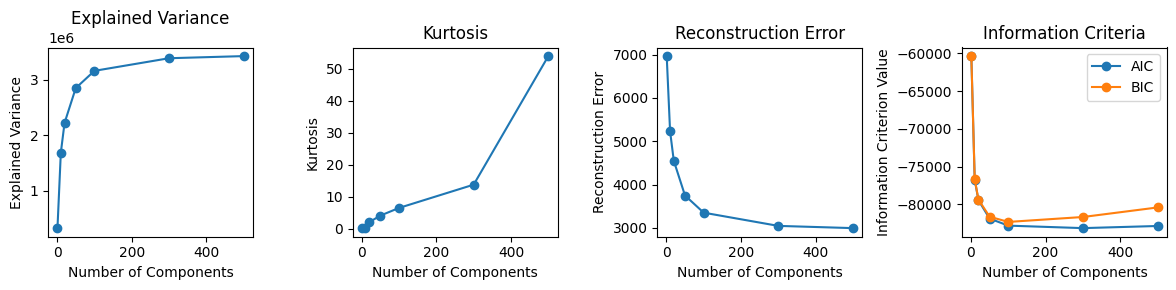

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis

X_scaled = X_selected

# Initialize lists to store metrics
explained_variance = []
kurtosis_values = []
reconstruction_errors = []
aic_values = []
bic_values = []

# Define the range of components to explore
n_components_range = [1, 10, 20, 50, 100, 300, 500]

# Perform ICA and compute metrics for each number of components
for n_components in n_components_range:
    # Fit ICA
    ica = FastICA(n_components=n_components, random_state=42)
    S_ = ica.fit_transform(X_scaled)
    A_ = ica.mixing_
    
    # Compute explained variance by summing squares of the mixing matrix's columns
    explained_variance.append(np.sum(A_ ** 2))

    # Compute kurtosis
    kurtosis_values.append(np.mean(kurtosis(S_, axis=0)))

    # Compute reconstruction error
    X_reconstructed = np.dot(S_, A_.T)
    reconstruction_errors.append(mean_squared_error(X_scaled, X_reconstructed))

    # Compute AIC and BIC
    log_likelihood = -0.5 * X_reshaped.shape[1] * np.log(np.mean(X_reconstructed ** 2))
    aic = 2 * log_likelihood + 2 * n_components
    bic = 2 * log_likelihood + np.log(X_reshaped.shape[0]) * n_components
    aic_values.append(aic)
    bic_values.append(bic)
    
    # Plot the metrics vs number of components
plt.figure(figsize=(12, 3))

# Explained variance
plt.subplot(1, 4, 1)
plt.plot(n_components_range, explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

# Kurtosis
plt.subplot(1, 4, 2)
plt.plot(n_components_range, kurtosis_values, marker='o')
plt.title('Kurtosis')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')

# Reconstruction Error
plt.subplot(1, 4, 3)
plt.plot(n_components_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')

# Information Criteria
plt.subplot(1, 4, 4)
plt.plot(n_components_range, aic_values, marker='o', label='AIC')
plt.plot(n_components_range, bic_values, marker='o', label='BIC')
plt.title('Information Criteria')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Value')
plt.legend()

plt.tight_layout()
plt.show()

# Randomized Projection

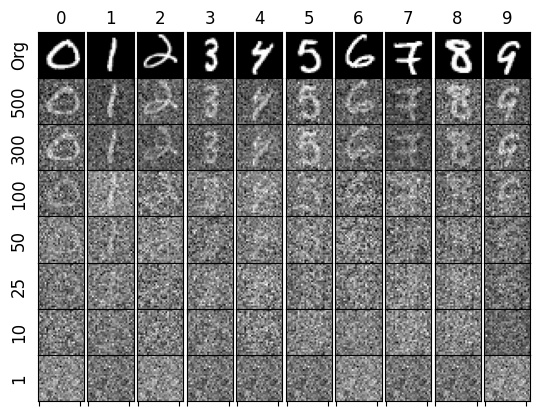

In [154]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt


rp_times = []
# Perform Randomized Projections inversion for different numbers of components
num_components_list = [500, 300, 100, 50, 25, 10, 1]

# Plot original and reconstructed images side by side
fig, axes = plt.subplots(len(num_components_list) + 1, 10)

for i, idx in enumerate(selected_indices):
    # Original image
    original_img = X_selected[idx].reshape(28, 28)
    axes[0, i].imshow(original_img, cmap='gray')
    axes[0, i].set_title(f'{y_selected.values[idx]}')
    axes[0, i].yaxis.set_ticklabels([])
    axes[0, i].xaxis.set_ticklabels([])
    axes[0, i].tick_params(left=False)
    axes[0, 0].set_ylabel(f'Org', fontsize=12, labelpad=0, loc="center")
    
# Perform Randomized Projections inversion for different numbers of components
for j, num_components in enumerate(num_components_list):
    
    start_time = time.time()
    
    
    # Perform Randomized Projections
    if num_components == 0:
        transformer = GaussianRandomProjection(random_state=42)
    else:
        transformer = GaussianRandomProjection(n_components=num_components, random_state=42)
    X_transformed = transformer.fit_transform(X_selected)
    end_time = time.time()
    fitting_time = end_time - start_time
    
    rp_times.append(fitting_time)
    X_reconstructed = np.dot(X_transformed, transformer.components_)
    # Reconstructed image
    for i, idx in enumerate(selected_indices):
        reconstructed_img = X_reconstructed[idx].reshape(28, 28)
        axes[j + 1, i].imshow(reconstructed_img, cmap='gray')
        axes[j + 1, i].yaxis.set_ticklabels([])
        axes[j + 1, i].xaxis.set_ticklabels([])
        axes[j + 1, i].tick_params(left=False)
        if i == 0:
            axes[j + 1, 0].set_ylabel(f'{num_components}', fontsize=12, labelpad=0, loc="center")
            axes[j + 1, 0].tick_params(left=False)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


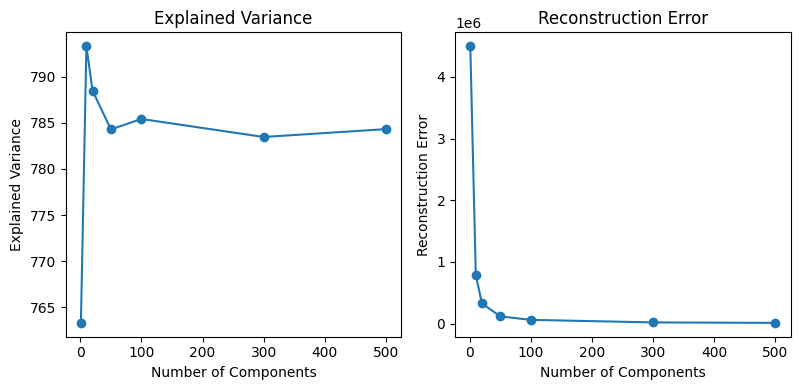

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X_selected is already defined
X_scaled = X_selected

# Initialize lists to store metrics
explained_variance = []
reconstruction_errors = []

# Define the range of components to explore
n_components_range = [1, 10, 20, 50, 100, 300, 500]

# Perform Randomized Projections and compute metrics for each number of components
for n_components in n_components_range:
    # Fit Randomized Projections
    transformer = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_transformed = transformer.fit_transform(X_scaled)
    
    # Compute explained variance
    explained_variance.append(np.sum(transformer.components_ ** 2))

    # Reconstruct data and compute reconstruction error
    X_reconstructed = np.dot(X_transformed, transformer.components_)
    reconstruction_errors.append(mean_squared_error(X_scaled, X_reconstructed))

# Plot the metrics vs number of components
plt.figure(figsize=(12, 4))

# Explained variance
plt.subplot(1, 3, 1)
plt.plot(n_components_range, explained_variance, marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

# Reconstruction Error
plt.subplot(1, 3, 2)
plt.plot(n_components_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')

plt.tight_layout()
plt.show()


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider 

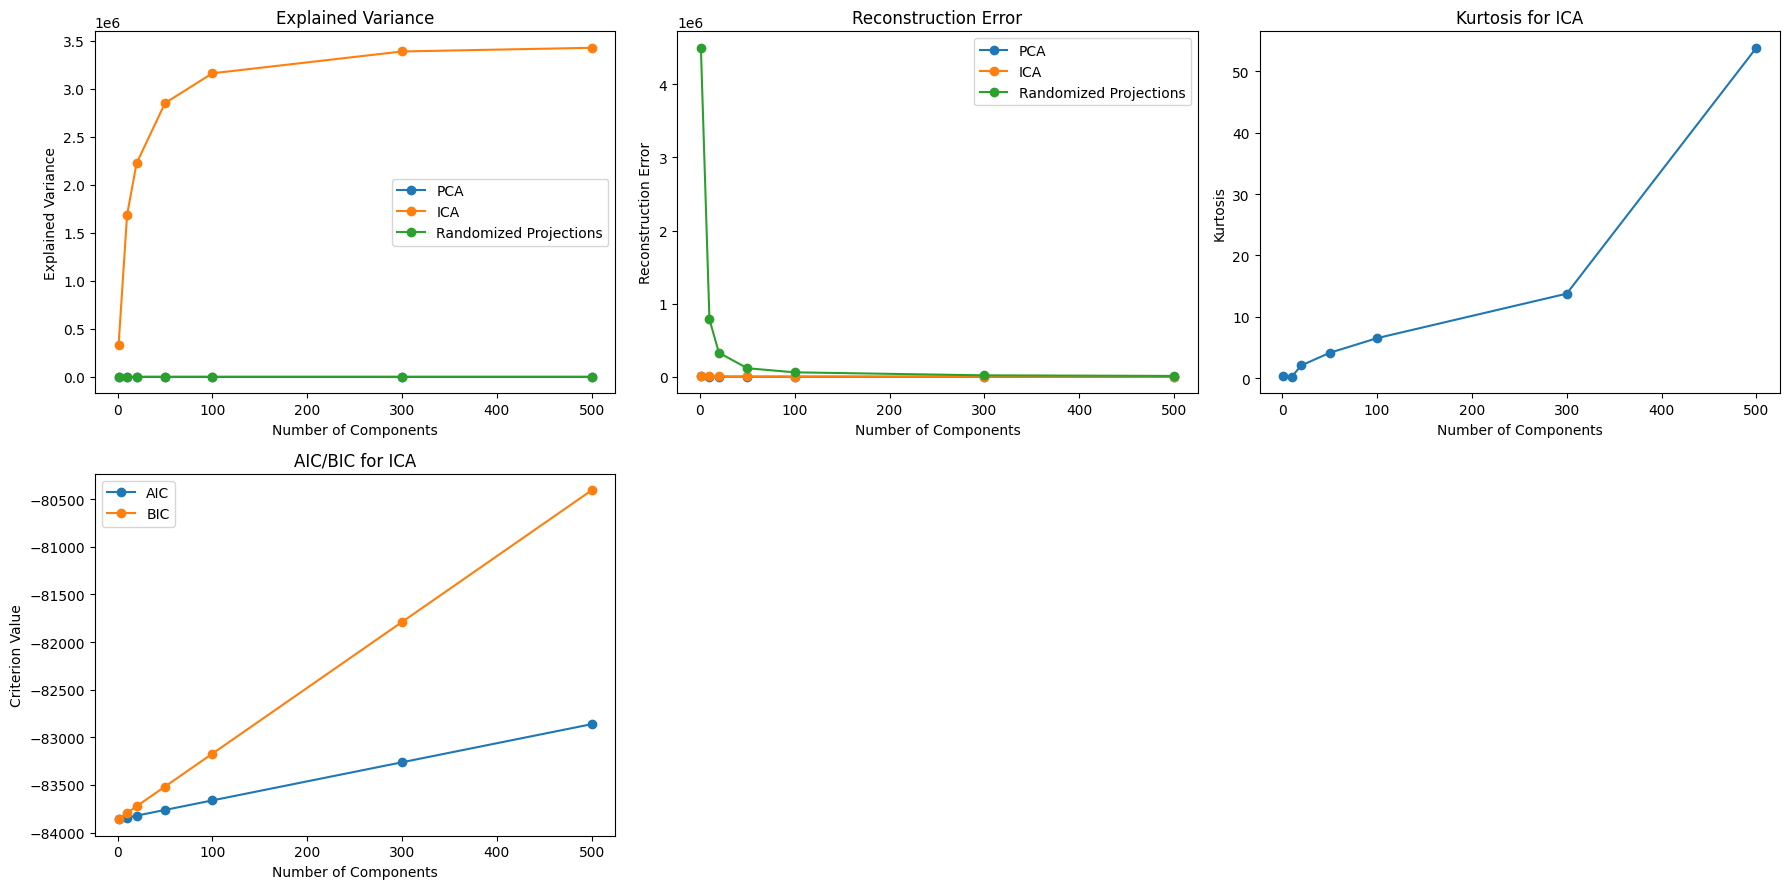

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis

X_scaled = X_selected

# Define the range of components to explore
n_components_range = [1, 10, 20, 50, 100, 300, 500]

# Initialize lists to store metrics
pca_explained_variance = []
ica_explained_variance = []
rp_explained_variance = []
pca_reconstruction_errors = []
ica_reconstruction_errors = []
rp_reconstruction_errors = []

# Perform PCA, ICA, and Randomized Projections and compute metrics for each number of components
for n_components in n_components_range:
    # PCA
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_scaled)
    pca_explained_variance.append(np.sum(pca.explained_variance_ratio_))
    X_pca_reconstructed = pca.inverse_transform(pca.transform(X_scaled))
    pca_reconstruction_errors.append(mean_squared_error(X_scaled, X_pca_reconstructed))
    
    # ICA
    ica = FastICA(n_components=n_components, random_state=42)
    S_ = ica.fit_transform(X_scaled)
    A_ = ica.mixing_
    ica_explained_variance.append(np.sum(A_ ** 2))
    X_ica_reconstructed = np.dot(S_, A_.T)
    ica_reconstruction_errors.append(mean_squared_error(X_scaled, X_ica_reconstructed))
    
    # Randomized Projections
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_rp_transformed = rp.fit_transform(X_scaled)
    rp_explained_variance.append(np.sum(rp.components_ ** 2))
    X_rp_reconstructed = np.dot(X_rp_transformed, rp.components_)
    rp_reconstruction_errors.append(mean_squared_error(X_scaled, X_rp_reconstructed))

# Plot metrics for PCA, ICA, and Randomized Projections
plt.figure(figsize=(18, 9))

# Explained variance
plt.subplot(2, 3, 1)
plt.plot(n_components_range, pca_explained_variance, marker='o', label='PCA')
plt.plot(n_components_range, ica_explained_variance, marker='o', label='ICA')
plt.plot(n_components_range, rp_explained_variance, marker='o', label='Randomized Projections')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.legend()

# Reconstruction Error
plt.subplot(2, 3, 2)
plt.plot(n_components_range, pca_reconstruction_errors, marker='o', label='PCA')
plt.plot(n_components_range, ica_reconstruction_errors, marker='o', label='ICA')
plt.plot(n_components_range, rp_reconstruction_errors, marker='o', label='Randomized Projections')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Kurtosis, AIC, BIC for ICA
ica_kurtosis_values = []
ica_aic_values = []
ica_bic_values = []
for n_components in n_components_range:
    ica = FastICA(n_components=n_components, random_state=42)
    S_ = ica.fit_transform(X_scaled)
    ica_kurtosis_values.append(np.mean(kurtosis(S_, axis=0)))
    log_likelihood = -0.5 * X_scaled.shape[1] * np.log(np.mean(X_ica_reconstructed ** 2))
    aic = 2 * log_likelihood + 2 * n_components
    bic = 2 * log_likelihood + np.log(X_scaled.shape[0]) * n_components
    ica_aic_values.append(aic)
    ica_bic_values.append(bic)

plt.subplot(2, 3, 3)
plt.plot(n_components_range, ica_kurtosis_values, marker='o')
plt.title('Kurtosis for ICA')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')

plt.subplot(2, 3, 4)
plt.plot(n_components_range, ica_aic_values, marker='o', label='AIC')
plt.plot(n_components_range, ica_bic_values, marker='o', label='BIC')
plt.title('AIC/BIC for ICA')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.legend()

plt.tight_layout()
plt.show()


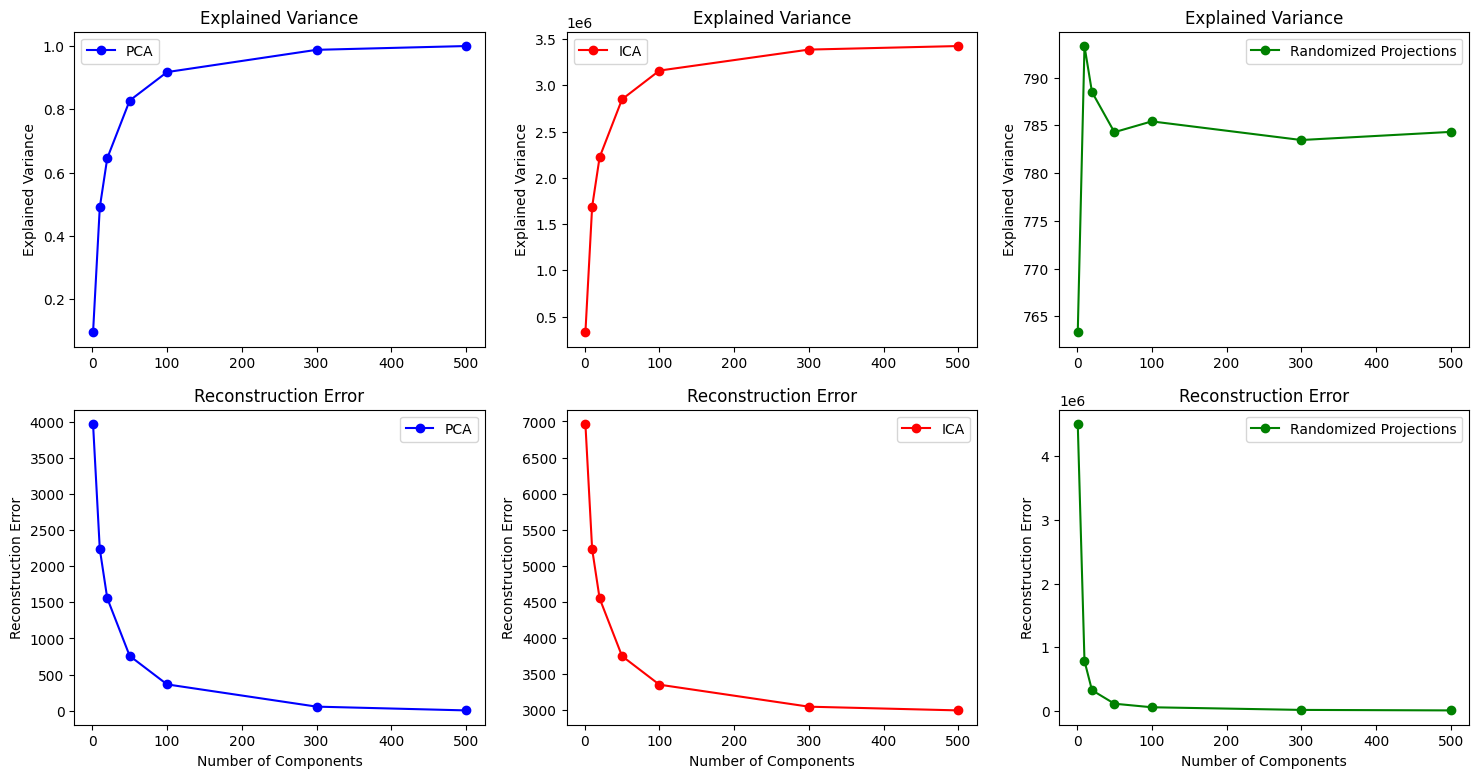

In [175]:
# Plot metrics for PCA, ICA, and Randomized Projections
plt.figure(figsize=(18, 9))

# Explained variance
plt.subplot(2, 3, 1)
plt.plot(n_components_range, pca_explained_variance, marker='o', label='PCA', color='b')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()

# Explained variance
plt.subplot(2, 3, 2)
plt.plot(n_components_range, ica_explained_variance, marker='o', label='ICA', color='r')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()

# Explained variance
plt.subplot(2, 3, 3)
plt.plot(n_components_range, rp_explained_variance, marker='o', label='Randomized Projections', color='g')
plt.title('Explained Variance')
plt.ylabel('Explained Variance')
plt.legend()


# Reconstruction Error
plt.subplot(2, 3, 4)
plt.plot(n_components_range, pca_reconstruction_errors, marker='o', label='PCA', color='b')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Reconstruction Error
plt.subplot(2, 3, 5)
plt.plot(n_components_range, ica_reconstruction_errors, marker='o', label='ICA', color='r')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

# Reconstruction Error
plt.subplot(2, 3, 6)
plt.plot(n_components_range, rp_reconstruction_errors, marker='o', label='Randomized Projections', color='g')
plt.title('Reconstruction Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()

d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


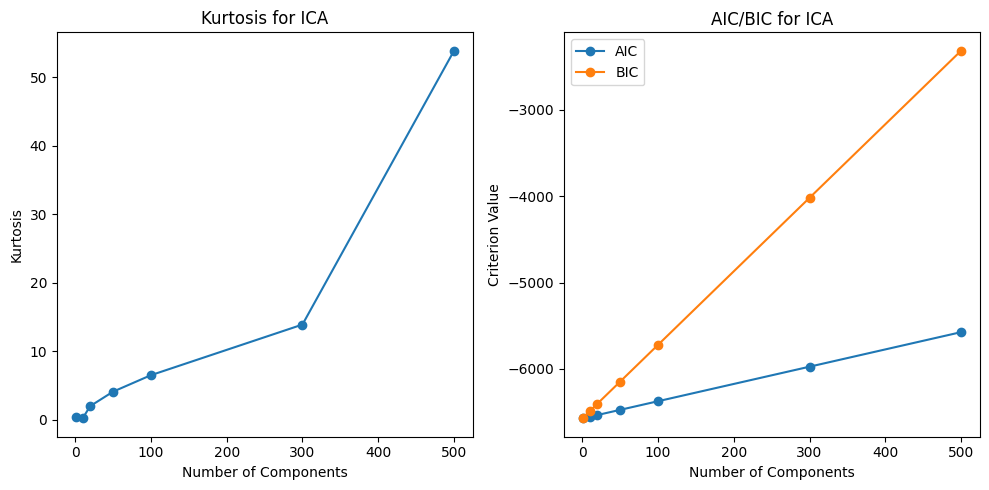

In [174]:
# Kurtosis, AIC, BIC for ICA
ica_kurtosis_values = []
ica_aic_values = []
ica_bic_values = []
for n_components in n_components_range:
    ica = FastICA(n_components=n_components, random_state=42, max_iter = 500, tol = 0.001)
    S_ = ica.fit_transform(X_scaled)
    ica_kurtosis_values.append(np.mean(kurtosis(S_, axis=0)))
    log_likelihood = -0.5 * X_scaled.shape[1] * np.log(np.mean(X_ica_reconstructed ** 2))
    aic = 2 * log_likelihood + 2 * n_components
    bic = 2 * log_likelihood + np.log(X_scaled.shape[0]) * n_components
    ica_aic_values.append(aic)
    ica_bic_values.append(bic)
    
# Plot metrics for PCA, ICA, and Randomized Projections
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, ica_kurtosis_values, marker='o')
plt.title('Kurtosis for ICA')
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')

plt.subplot(1, 2, 2)
plt.plot(n_components_range, ica_aic_values, marker='o', label='AIC')
plt.plot(n_components_range, ica_bic_values, marker='o', label='BIC')
plt.title('AIC/BIC for ICA')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.legend()

plt.tight_layout()
plt.show()

# Tabulating time and reconstruction error

In [235]:
# Sample dictionary
data = {
    'PCA': pca_times,
    'ICA': ica_times,
    'RP': rp_times
}

np.savez("data", **data)

In [234]:
print(pd.DataFrame(data, index=[500, 300, 100, 50, 25, 10, 1]))

             PCA          ICA           RP
500  3972.602783  3972.602783  3972.602783
300  2240.702881  2240.702881  2240.702881
100  1557.591675  1557.591675  1557.591675
50    757.879456   757.879456   757.879456
25    363.018494   363.018494   363.018494
10     54.598362    54.598362    54.598362
1       2.312041     2.312041     2.312041


In [236]:
# Sample dictionary
data = {
    'PCA': pca_reconstruction_errors,
    'ICA': ica_reconstruction_errors,
    'RP': rp_reconstruction_errors
}

print(pd.DataFrame(data, index=[1, 10, 20, 50, 100, 300, 500]))

             PCA          ICA            RP
1    3972.602783  6964.128906  4.499096e+06
10   2240.702881  5232.233887  7.862776e+05
20   1557.591675  4549.107910  3.283485e+05
50    757.879456  3749.291504  1.165918e+05
100   363.018494  3353.478271  6.087778e+04
300    54.598362  3048.564209  1.938138e+04
500     2.312041  2997.053467  1.162690e+04


In [210]:
import pandas as pd
from tabulate import tabulate

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Convert DataFrame to ASCII table with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Display ASCII table
print(table)

ModuleNotFoundError: No module named 'tabulate'

## t-SNE

In [176]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(X_selected)

d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **k

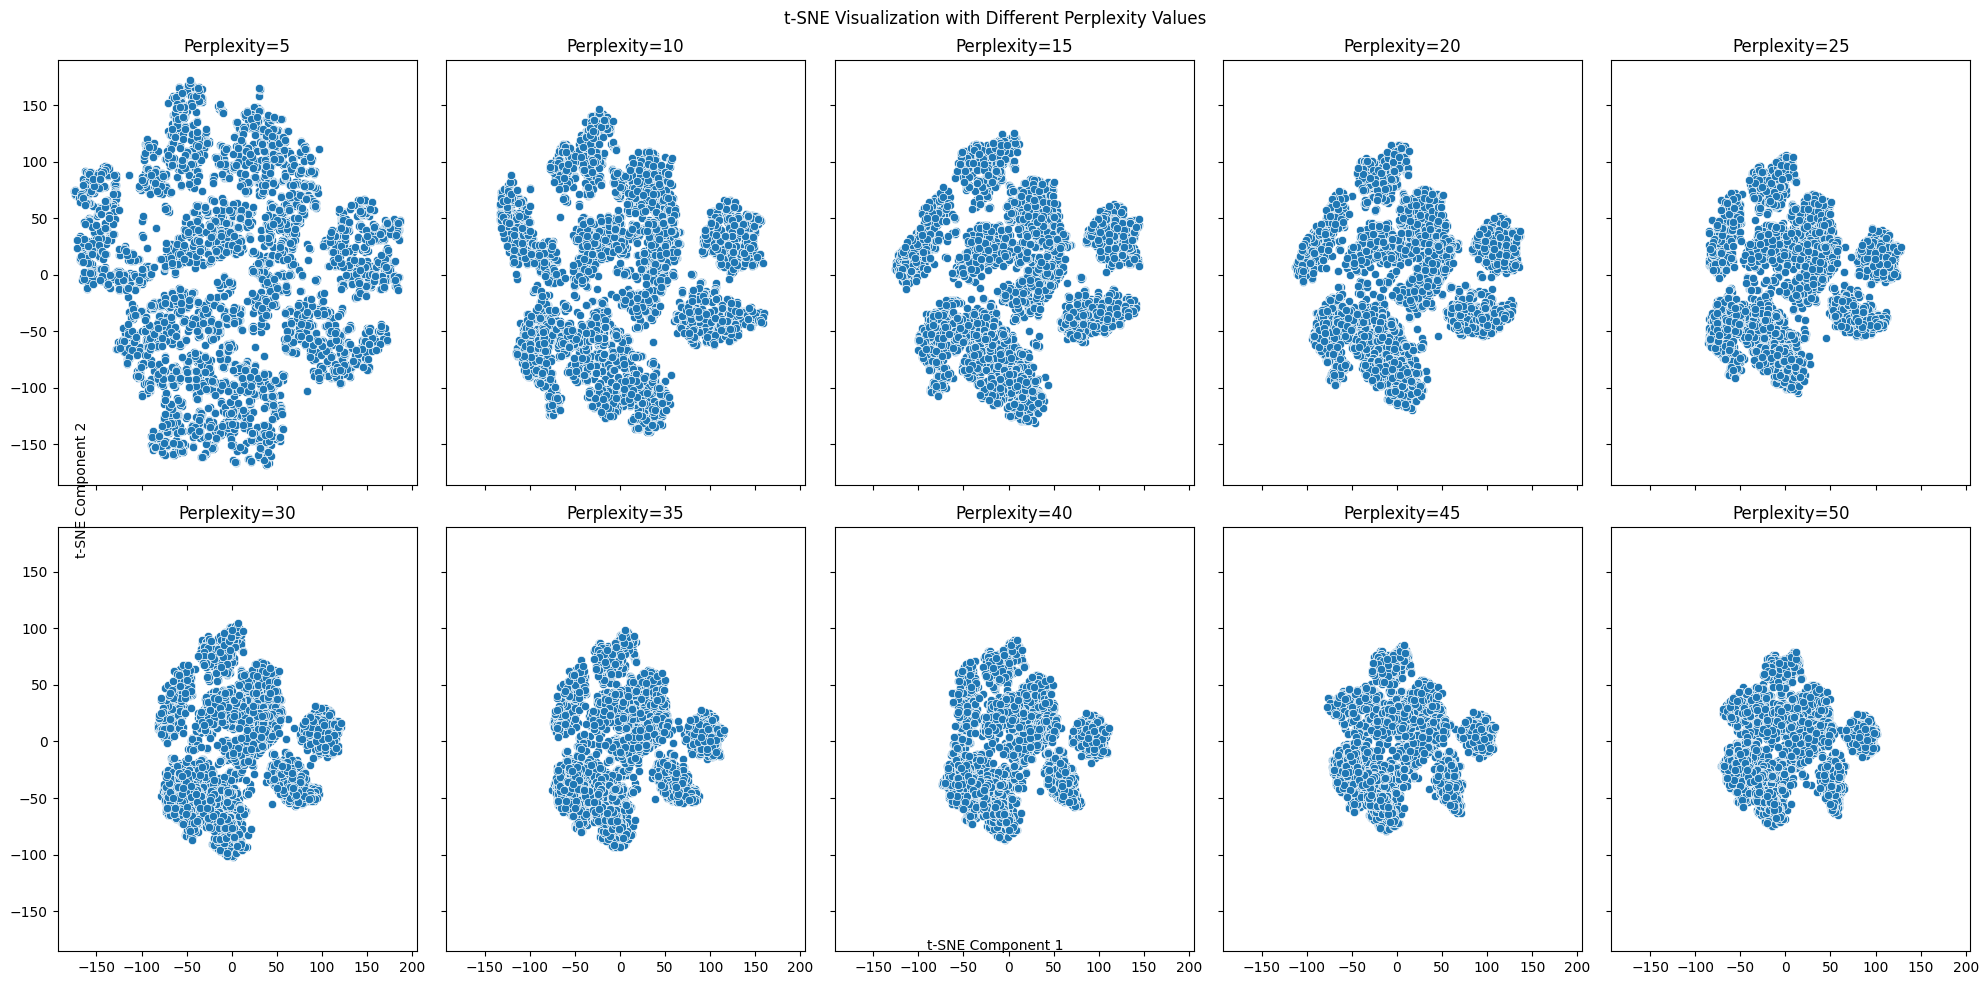

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Assuming X_selected is your high-dimensional data
# Initialize a list to store t-SNE results for different perplexity values
tsne_results = []

# Perplexity values to iterate over
perplexities = np.arange(5, 51, 5)

# Loop over each perplexity value and fit t-SNE model
for perplexity in perplexities:
    model = TSNE(n_components=2, random_state=0, perplexity=perplexity, n_iter=5000)
    tsne_data = model.fit_transform(X_selected)
    tsne_results.append(tsne_data)
    


d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  points = ax.scatter(x=x, y=y, **kws)
d:\GATech\Assignment3\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: *c* argument looks like a sing

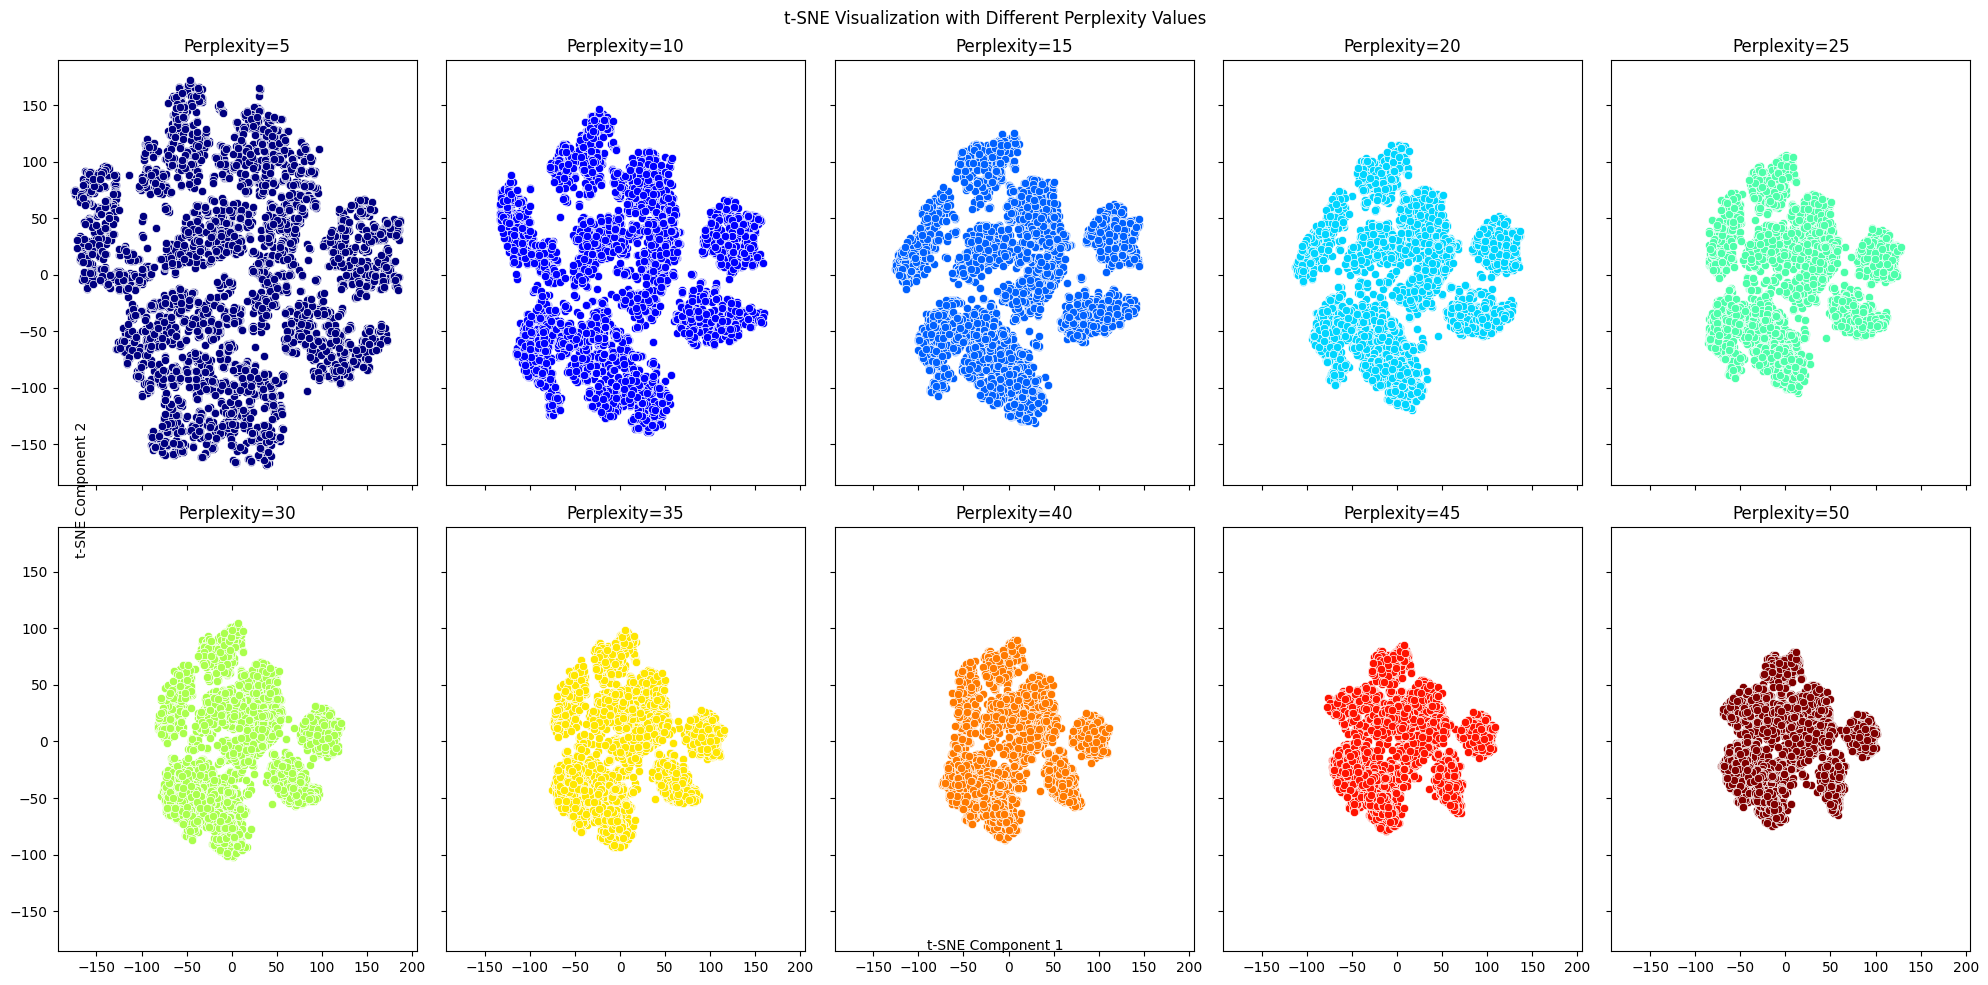

In [189]:
# Assuming tsne_results is a list containing t-SNE embeddings for different perplexity values

# Create a list of perplexity values for labeling
perplexities = np.arange(5, 51, 5)

# Plot t-SNE results for each perplexity value in subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)

colors = plt.cm.jet(np.linspace(0, 1, 10))

for i, ax in enumerate(axes.flat):
    tsne_data = tsne_results[i]
    sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], ax=ax, c=colors[i])
    ax.set_title(f'Perplexity={perplexities[i]}')

# Add common labels and title
fig.suptitle('t-SNE Visualization with Different Perplexity Values')
fig.text(0.5, 0.04, 't-SNE Component 1', ha='center')
fig.text(0.04, 0.5, 't-SNE Component 2', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

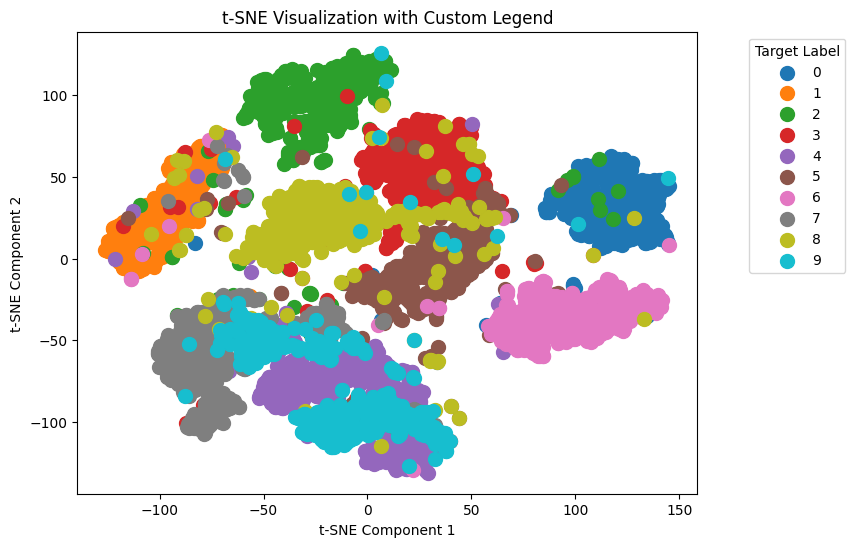

In [31]:
import matplotlib.pyplot as plt
colors = plt.cm.tab10(np.linspace(0, 1, 10))
# Assuming tsne_data is your t-SNE embeddings and y_selected is your target labels
# colors is a dictionary mapping target labels to colors

# Plot t-SNE embeddings with custom legend
plt.figure(figsize=(8, 6))
for label, color in enumerate(colors):
    indices = (y_selected.values == label)
    plt.scatter(tsne_data[indices, 0], tsne_data[indices, 1], color=color, label=label, s=100, alpha=1)
plt.legend(title='Target Label', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('t-SNE Visualization with Custom Legend')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Plotting result

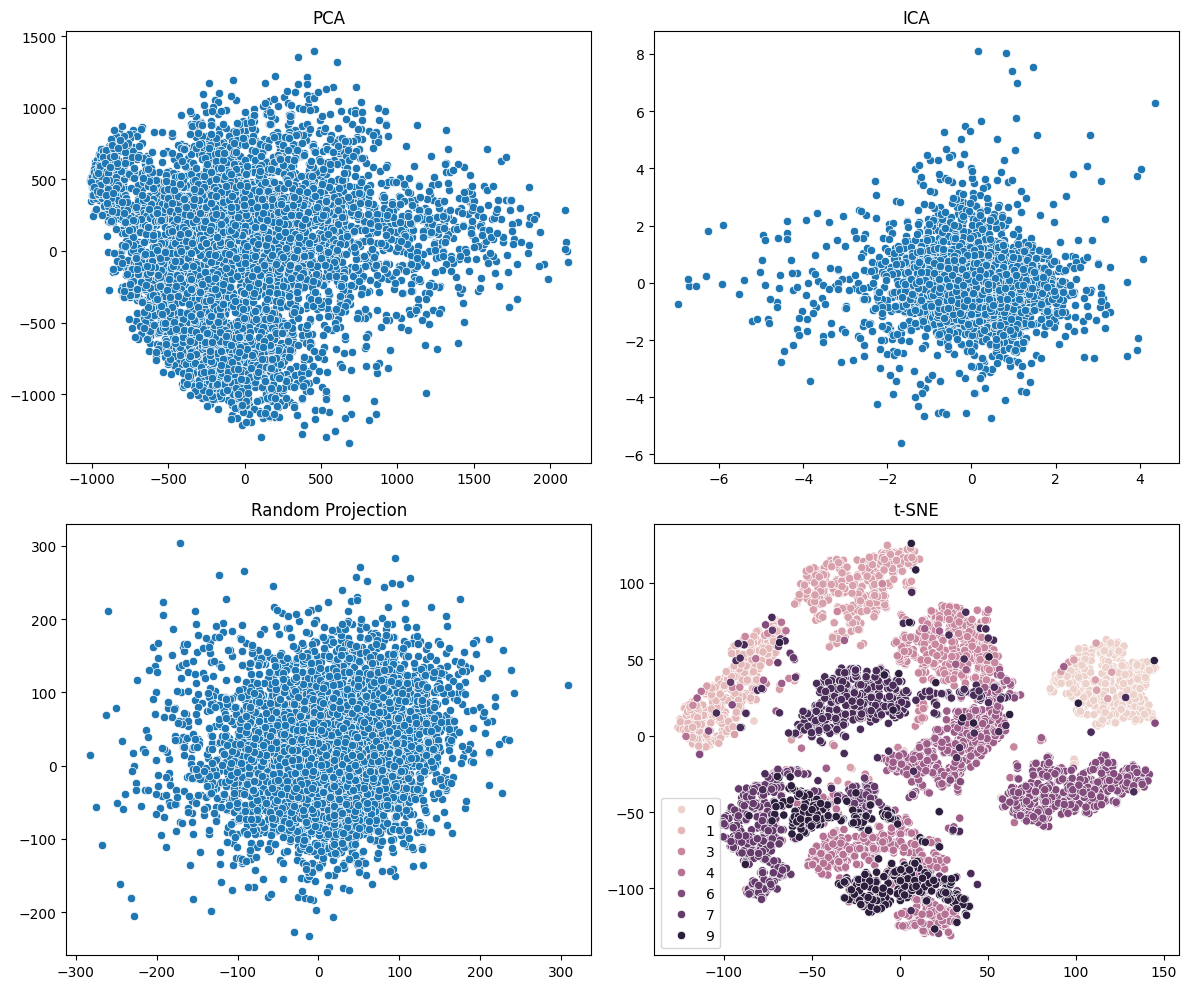

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE


# PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_selected)

# ICA
ica = FastICA(n_components=100)
X_ica = ica.fit_transform(X_selected)

# Random Projection
rp = GaussianRandomProjection(n_components=500)
X_rp = rp.fit_transform(X_selected)

model = TSNE(n_components=2, random_state=0, perplexity=15, n_iter=5000)
X_tsne = model.fit_transform(X_selected)


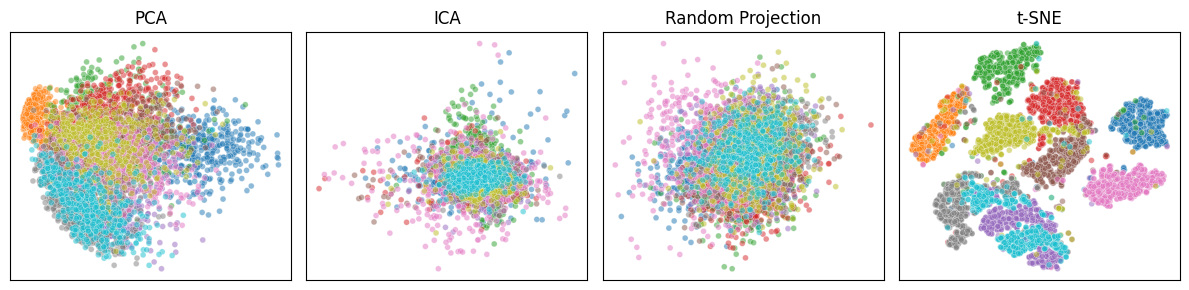

In [29]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

# Plot PCA scatter plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], ax=axes[0],  hue = y_selected.values,  size=2, alpha = 0.5, palette=sns.color_palette("tab10"), legend=False
)
axes[ 0].set_title('PCA')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot ICA scatter plot
sns.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1], ax=axes[1],  hue = y_selected.values,  size=2, alpha = 0.5,palette=sns.color_palette("tab10"), legend=False)
axes[1].set_title('ICA')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Plot RP scatter plot
sns.scatterplot(x=X_rp[:, 0], y=X_rp[:, 1], ax=axes[2],  hue = y_selected.values,  size=2, alpha = 0.5, palette=sns.color_palette("tab10"), legend=False)
axes[2].set_title('Random Projection')
axes[2].set_xticks([])
axes[2].set_yticks([])

# Plot t-SNE scatter plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], ax=axes[3], hue = y_selected.values, size=2, alpha = 0.5, palette=sns.color_palette("tab10"), legend=False)
axes[3].set_title('t-SNE')
axes[3].set_xticks([])
axes[3].set_yticks([])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import numpy as np

def calculate_purity(clusters, true_labels):
    """
    Calculate the purity of clustering results.

    Parameters:
    clusters (array-like): Array containing cluster assignments for each data point.
    true_labels (array-like): Array containing true labels for each data point.

    Returns:
    purity (float): Purity score of the clustering results.
    """
    # Number of data points
    n = len(clusters)
    
    # Number of clusters
    k = len(np.unique(clusters))
    
    # Initialize purity
    purity = 0
    
    # Loop over each cluster
    for cluster in np.unique(clusters):
        # Find the true labels corresponding to this cluster
        cluster_labels = true_labels[clusters == cluster]
        
        # Count the occurrences of each true label
        label_counts = np.bincount(cluster_labels)
        
        # Find the majority label in this cluster
        majority_label = np.argmax(label_counts)
        
        # Add the count of the majority label to purity
        purity += np.max(label_counts)
    
    # Normalize purity by the number of data points
    purity /= n
    
    return purity

In [40]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


X = X_selected
y = y_selected

all_purities = []

for r in [10, 20, 30, 40, 50]:
    # Dictionary to store labels
    labels_dict = {}

    # Dimensionality reduction techniques
    pca = PCA(n_components=100, random_state=r)
    ica = FastICA(n_components=100, random_state=r)
    rp = GaussianRandomProjection(n_components=100, random_state=r)
    tsne = TSNE(n_components=2, perplexity=15, random_state=r)

    # Clustering algorithms
    kmeans = KMeans(n_clusters=10, random_state=r)
    gmm = GaussianMixture(n_components=10, random_state=r)

    # Dimensionality reduction followed by clustering
    for method, name in zip([pca, ica, rp, tsne], ['PCA', 'ICA', 'RP', 't-SNE']):
        # Fit dimensionality reduction
        X_transformed = method.fit_transform(X)
        
        # Fit clustering algorithm
        clusters = kmeans.fit_predict(X_transformed)  # Use k-means for t-SNE
        labels_dict[f'{name}_kmeans'] = clusters
        clusters = gmm.fit_predict(X_transformed)  # Use GMM for other methods
        labels_dict[f'{name}_gmm'] = clusters

    # Access labels for each experiment
    all_purities.append([calculate_purity(labels_dict[i], y_selected) for i in labels_dict])


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [46]:
labels_dict.keys()

dict_keys(['PCA_kmeans', 'PCA_gmm', 'ICA_kmeans', 'ICA_gmm', 'RP_kmeans', 'RP_gmm', 't-SNE_kmeans', 't-SNE_gmm'])

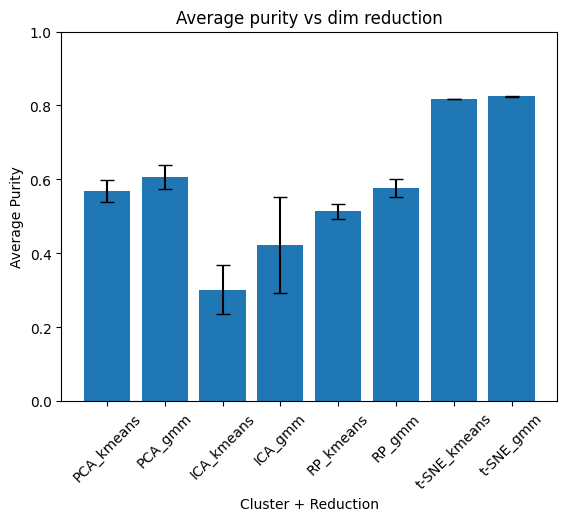

In [50]:
# Plot bar plot with error bars
plt.figure()
plt.bar(labels_dict.keys(), np.mean(all_purities, axis=0), yerr=np.std(all_purities, axis=0), capsize=5)
plt.xlabel('Cluster + Reduction')
plt.ylabel('Average Purity')
plt.title('Average purity vs dim reduction')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()

In [36]:
[calculate_purity(labels_dict[i], y_selected) for i in labels_dict]

[0.5672, 0.6054, 0.3242, 0.5638, 0.5648, 0.6192, 0.8184, 0.8232]

# Neural Network with DR

In [94]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (X) and labels (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Select 500 instances from each class
np.random.seed(42)  # for reproducibility
selected_indices = []
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices.extend(np.random.choice(class_indices, size=500, replace=False))

# Filter the selected instances
X = X.values[selected_indices]
y = y.values[selected_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy_norm = []
accuracy_pca = []
accuracy_ica = []
accuracy_rp = []
accuracy_tsne = []

loss_norm = []
loss_pca = []
loss_ica = []
loss_rp = []
loss_tsne = []

training_time_norm = []
training_time_pca = []
training_time_ica = []
training_time_rp = []
training_time_tsne = []

for r in [10, 20, 30, 50]:
    # Dimensionality reduction techniques
    pca = PCA(n_components=100, random_state=r)
    ica = FastICA(n_components=100, random_state=r)
    rp = GaussianRandomProjection(n_components=100, random_state=r)
    tsne = TSNE(n_components=2, perplexity=15, random_state=r)

    # Transform the data using dimensionality reduction techniques
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    X_train_ica = ica.fit_transform(X_train_scaled)
    X_test_ica = ica.transform(X_test_scaled)

    X_train_rp = rp.fit_transform(X_train_scaled)
    X_test_rp = rp.transform(X_test_scaled)

    X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test), axis=0))
    X_train_tsne = X_tsne[:4000]
    X_test_tsne = X_tsne[4000:]

    # Train a simple neural network and measure the time
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=r, early_stopping=True)
    mlp.fit(X_train_scaled, y_train)
    training_time_norm.append(time.time() - start_time)
    loss_norm.append(mlp.loss_curve_[-1])
    y_pred = mlp.predict(X_test_scaled)
    
    start_time = time.time()
    mlp.fit(X_train_pca, y_train)
    training_time_pca.append(time.time() - start_time)
    y_pred_pca = mlp.predict(X_test_pca)
    loss_pca.append(mlp.loss_curve_[-1])

    start_time = time.time()
    mlp.fit(X_train_ica, y_train)
    training_time_ica.append(time.time() - start_time)
    y_pred_ica = mlp.predict(X_test_ica)
    loss_ica.append(mlp.loss_curve_[-1])

    start_time = time.time()
    mlp.fit(X_train_rp, y_train)
    training_time_rp.append(time.time() - start_time)
    y_pred_rp = mlp.predict(X_test_rp)
    loss_rp.append(mlp.loss_curve_[-1])

    start_time = time.time()
    mlp.fit(X_train_tsne, y_train)
    training_time_tsne.append(time.time() - start_time)
    y_pred_tsne = mlp.predict(X_test_tsne)
    loss_tsne.append(mlp.loss_curve_[-1])

    # Calculate accuracy
    accuracy_norm.append(accuracy_score(y_test, y_pred))
    accuracy_pca.append(accuracy_score(y_test, y_pred_pca))
    accuracy_ica.append(accuracy_score(y_test, y_pred_ica))
    accuracy_rp.append(accuracy_score(y_test, y_pred_rp))
    accuracy_tsne.append(accuracy_score(y_test, y_pred_tsne))

# Print accuracy and training time
print("Accuracy (NN):", accuracy_norm)
print("Training Time (NN):", training_time_norm)

print("Accuracy (PCA):", accuracy_pca)
print("Training Time (PCA):", training_time_pca)

print("Accuracy (ICA):", accuracy_ica)
print("Training Time (ICA):", training_time_ica)

print("Accuracy (RP):", accuracy_rp)
print("Training Time (RP):", training_time_rp)

print("Accuracy (t-SNE):", accuracy_tsne)
print("Training Time (t-SNE):", training_time_tsne)


d:\GATech\Assignment3\.venv\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Accuracy (NN): [0.919, 0.931, 0.918, 0.912]
Training Time (NN): [2.3733489513397217, 5.091589450836182, 3.815465211868286, 2.490912675857544]
Accuracy (PCA): [0.911, 0.913, 0.905, 0.92]
Training Time (PCA): [4.829246759414673, 3.818638324737549, 5.636437892913818, 5.789866924285889]
Accuracy (ICA): [0.906, 0.901, 0.907, 0.9]
Training Time (ICA): [4.156191825866699, 5.57938027381897, 8.351040840148926, 4.964752674102783]
Accuracy (RP): [0.858, 0.863, 0.878, 0.875]
Training Time (RP): [4.527059316635132, 4.248580455780029, 7.7541258335113525, 5.159802675247192]
Accuracy (t-SNE): [0.831, 0.855, 0.858, 0.816]
Training Time (t-SNE): [4.638167142868042, 8.175440549850464, 10.535919427871704, 2.9613237380981445]


In [101]:
np.mean([accuracy_norm,
accuracy_pca,
accuracy_ica,
accuracy_rp,
accuracy_tsne,], axis = 1)

array([0.92   , 0.91225, 0.9035 , 0.8685 , 0.84   ])

In [95]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "PCA", "ICA", "RP", "t-SNE"], np.mean([accuracy_norm,
accuracy_pca,
accuracy_ica,
accuracy_rp,
accuracy_tsne,], axis = 1), yerr=np.std([accuracy_norm,
accuracy_pca,
accuracy_ica,
accuracy_rp,
accuracy_tsne,], axis = 1), capsize=5)
plt.xlabel('Cluster + Reduction')
plt.ylabel('Average accuracy')
plt.title('Average accuracy vs dim reduction')
plt.xticks(rotation=45)
plt.ylim([0, 1.2])
plt.show()

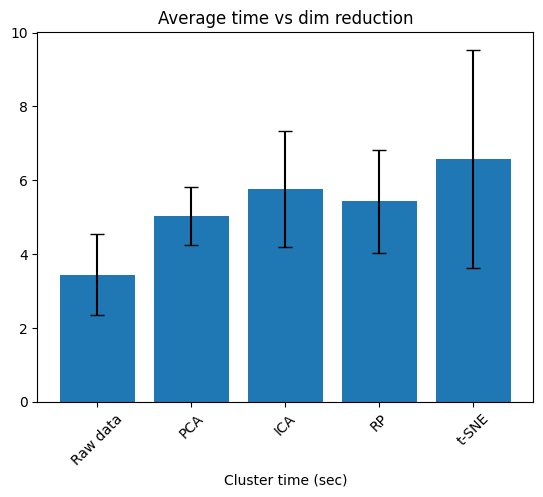

In [96]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "PCA", "ICA", "RP", "t-SNE"], np.mean([training_time_norm,
training_time_pca,
training_time_ica,
training_time_rp,
training_time_tsne], axis = 1), yerr=np.std([training_time_norm,
training_time_pca,
training_time_ica,
training_time_rp,
training_time_tsne], axis = 1), capsize=5)
plt.xlabel('Cluster time (sec)')
plt.title('Average time vs dim reduction')
plt.xticks(rotation=45)
plt.show()

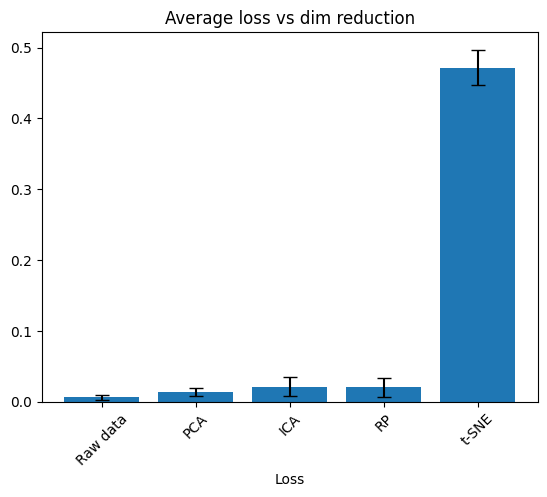

In [98]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "PCA", "ICA", "RP", "t-SNE"], np.mean([loss_norm,
loss_pca,
loss_ica,
loss_rp,
loss_tsne], axis = 1), yerr=np.std([loss_norm,
loss_pca,
loss_ica,
loss_rp,
loss_tsne], axis = 1), capsize=5)
plt.xlabel('Loss')
plt.title('Average loss vs dim reduction')
plt.xticks(rotation=45)
plt.show()

# Part 5

In [146]:
def get_gaussian_rep(X_train, r, X_test):
    X_train_gauss = []
    X_test_gauss = []
    for i in [10, 40, 50]:
        gmm = GaussianMixture(n_components=i, random_state=r)
        gmm.fit(X_train)
        predict_probs_train = gmm.predict_proba(X_train)
        predict_probs_test = gmm.predict_proba(X_test)
        if i == 10:
            X_train_gauss = predict_probs_train
            X_test_gauss = predict_probs_test
        else:
            X_train_gauss = np.concatenate((X_train_gauss, predict_probs_train), axis=1)
            X_test_gauss = np.concatenate((X_test_gauss, predict_probs_test), axis=1)
    return X_train_gauss, X_test_gauss


In [166]:
def get_kmeans_rep(X_train, r, X_test):
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    
    X_train_gauss = []
    X_test_gauss = []
    for i in [10, 40, 50]:
        kmeans = KMeans(n_clusters=i, random_state=r)
        kmeans.fit(X_train)
        predict_probs_train = encoder.fit_transform(kmeans.predict(X_train).reshape(-1, 1))
        predict_probs_test = encoder.fit_transform(kmeans.predict(X_test).reshape(-1, 1))
        if i == 10:
            X_train_gauss = predict_probs_train
            X_test_gauss = predict_probs_test
        else:
            X_train_gauss = np.concatenate((X_train_gauss, predict_probs_train), axis=1)
            X_test_gauss = np.concatenate((X_test_gauss, predict_probs_test), axis=1)
    return X_train_gauss, X_test_gauss

In [170]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)

# Extract features (X) and labels (y)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Select 500 instances from each class
np.random.seed(42)  # for reproducibility
selected_indices = []
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_indices.extend(np.random.choice(class_indices, size=500, replace=False))

# Filter the selected instances
X = X.values[selected_indices]
y = y.values[selected_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN and GMM parameters
n_neighbors = 10
n_components = 10  # Adjust as needed

# Initialize lists to store results
accuracy_norm = []
accuracy_gauss = []
accuracy_kmeans = []

loss_norm = []
loss_gauss = []
loss_kmeans = []

training_time_norm = []
training_time_gauss = []
training_time_kmeans = []

# Repeat for 5 random iterations
for r in [10, 20, 30, 40]:
    
    # Train a simple neural network and measure the time
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=r, early_stopping=True)
    mlp.fit(X_train_scaled, y_train)
    training_time_norm.append(time.time() - start_time)
    loss_norm.append(mlp.loss_curve_[-1])
    y_pred = mlp.predict(X_test_scaled)
      
    start_time = time.time()
    X_train_gauss, X_test_gauss = get_gaussian_rep(X_train, r, X_test)
    mlp.fit(X_train_gauss, y_train)
    training_time_gauss.append(time.time() - start_time)
    y_pred_gauss= mlp.predict(X_test_gauss)
    loss_gauss.append(mlp.loss_curve_[-1])

    
    start_time = time.time()
    X_train_kmeans, X_test_kmeans = get_kmeans_rep(X_train, 3, X_test)
    mlp.fit(X_train_kmeans, y_train)
    training_time_kmeans.append(time.time() - start_time)
    y_pred_kmeans = mlp.predict(X_test_kmeans)
    loss_kmeans.append(mlp.loss_curve_[-1])

    # Calculate accuracy
    accuracy_norm.append(accuracy_score(y_test, y_pred))
    accuracy_gauss.append(accuracy_score(y_test, y_pred_gauss))
    accuracy_kmeans.append(accuracy_score(y_test, y_pred_kmeans))
    


In [172]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "GMM", "KMeans"], np.mean([loss_norm,
loss_gauss,
loss_kmeans], axis = 1), yerr=np.std([loss_norm,
loss_gauss,
loss_kmeans], axis = 1), capsize=5)
plt.xlabel('Loss')
plt.title('Average loss vs dim reduction')
plt.xticks(rotation=45)
plt.show()

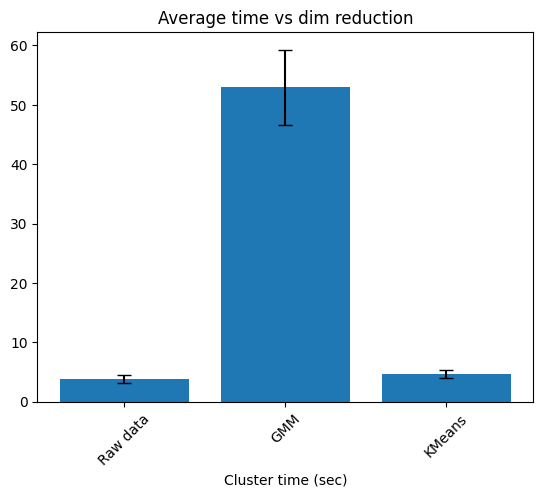

In [173]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "GMM", "KMeans"], np.mean([training_time_norm,
training_time_gauss,
training_time_kmeans], axis = 1), yerr=np.std([training_time_norm,
training_time_gauss,
training_time_kmeans], axis = 1), capsize=5)
plt.xlabel('Cluster time (sec)')
plt.title('Average time vs dim reduction')
plt.xticks(rotation=45)
plt.show()

In [174]:
# Plot bar plot with error bars
plt.figure()
plt.bar(["Raw data", "GMM", "KMeans"], np.mean([accuracy_norm,
accuracy_gauss,
accuracy_kmeans], axis = 1), yerr=np.std([accuracy_norm,
accuracy_gauss,
accuracy_kmeans], axis = 1), capsize=5)
plt.xlabel('Cluster + Reduction')
plt.ylabel('Average accuracy')
plt.title('Average accuracy vs dim reduction')
plt.xticks(rotation=45)
plt.ylim([0, 1.2])
plt.show()

In [176]:
np.mean([accuracy_norm,
accuracy_gauss,
accuracy_kmeans], axis= 1)


array([0.92175, 0.7415 , 0.82475])